# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [291]:
# Import the required libraries and dependencies
import pandas as pd

from pathlib import Path

import numpy as np

%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [292]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True 
)
whale_navs_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [293]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_df = whale_navs_daily_returns.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
whale_navs_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

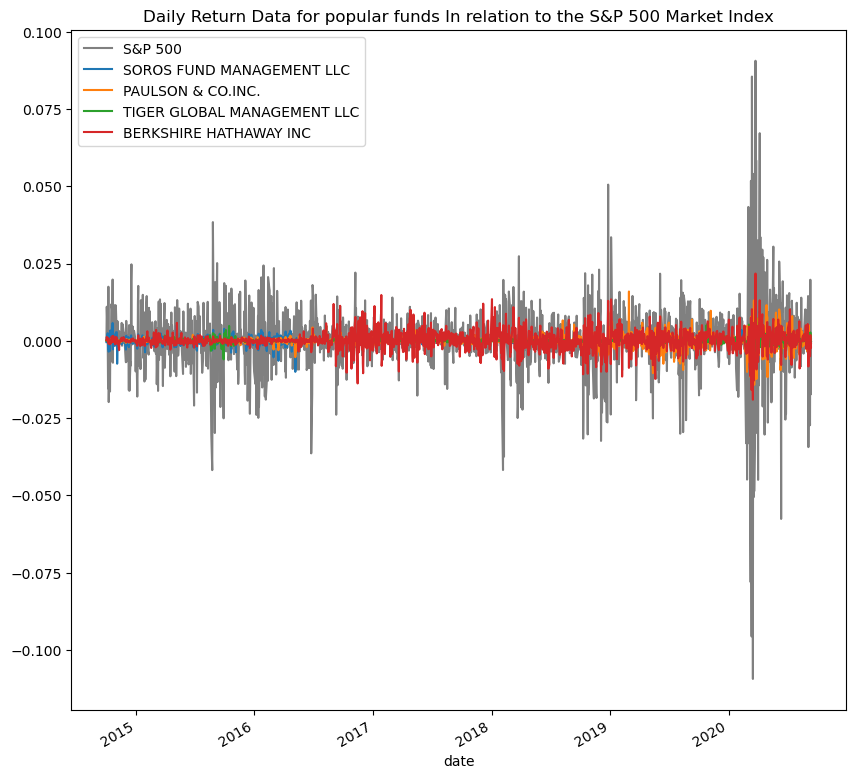

In [294]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
ax = whale_navs_daily_returns['S&P 500'].plot(color='grey',figsize=(10,10), title="Daily Return Data for popular funds In relation to the S&P 500 Market Index",legend=True,kind='line')   
whale_navs_daily_returns['SOROS FUND MANAGEMENT LLC'].plot(ax=ax)
whale_navs_daily_returns['PAULSON & CO.INC.'].plot(ax=ax)
whale_navs_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(ax=ax)
whale_navs_daily_returns['BERKSHIRE HATHAWAY INC'].plot(ax=ax)

ax.legend(["S&P 500","SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC",'BERKSHIRE HATHAWAY INC'])

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [295]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + whale_navs_daily_returns).cumprod()

cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns of Popular Funds; In Comparison to S&P 500'}, xlabel='date'>

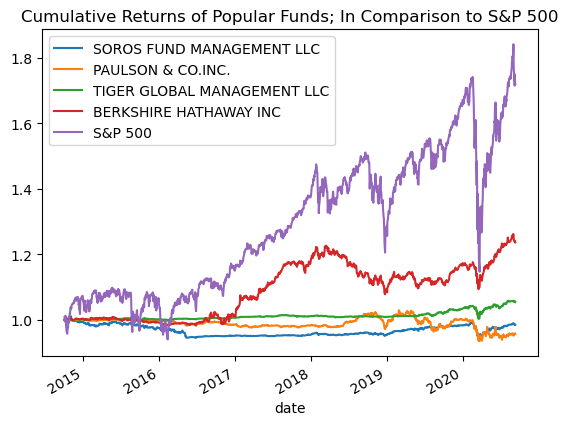

In [296]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size

cumulative_returns.plot(title='Cumulative Returns of Popular Funds; In Comparison to S&P 500') 

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # Not in returns, no. The only portfoliop that might hold some value, in comparison to the market, would be Berkshire Hathaway. Although the S&P 500 has alot more returns, we see that Berkshire Hathaway also has consistent returns, with less volatility (especially in times of crisis, such as during the 2020 stock market crash). Therefore, the S&P 500 would be the better portfolio option for a younger, more bullish investor, whereas Berkshire Hathaway is a solid option for the more risk-averse investor looking for long term, stable growth. The other three funds do not hold much value, there is no risk and no reward at all-- which means investors lose money in terms of time-value.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

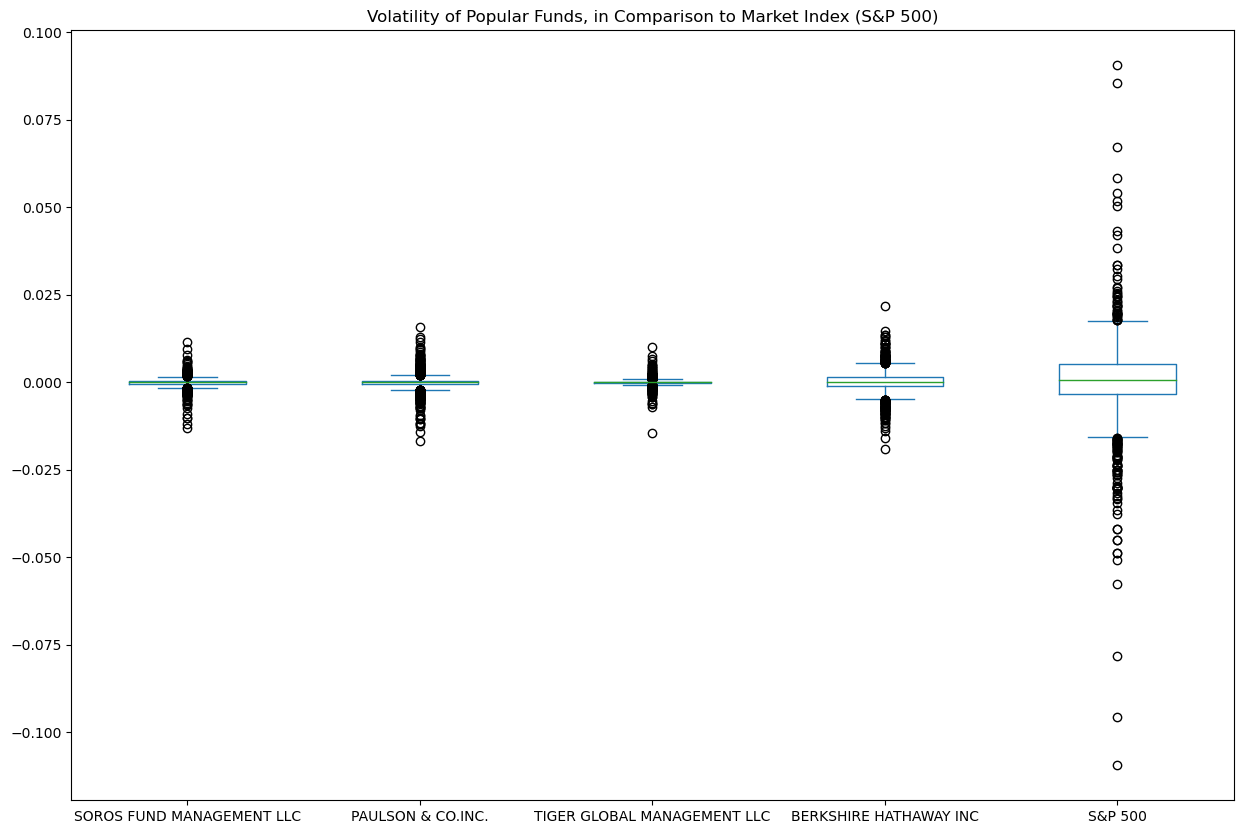

In [297]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
whale_navs_daily_returns.plot(kind='box',figsize=(15,10),title= 'Volatility of Popular Funds, in Comparison to Market Index (S&P 500)')
ax.legend(["S&P 500","SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC",'BERKSHIRE HATHAWAY INC'])

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

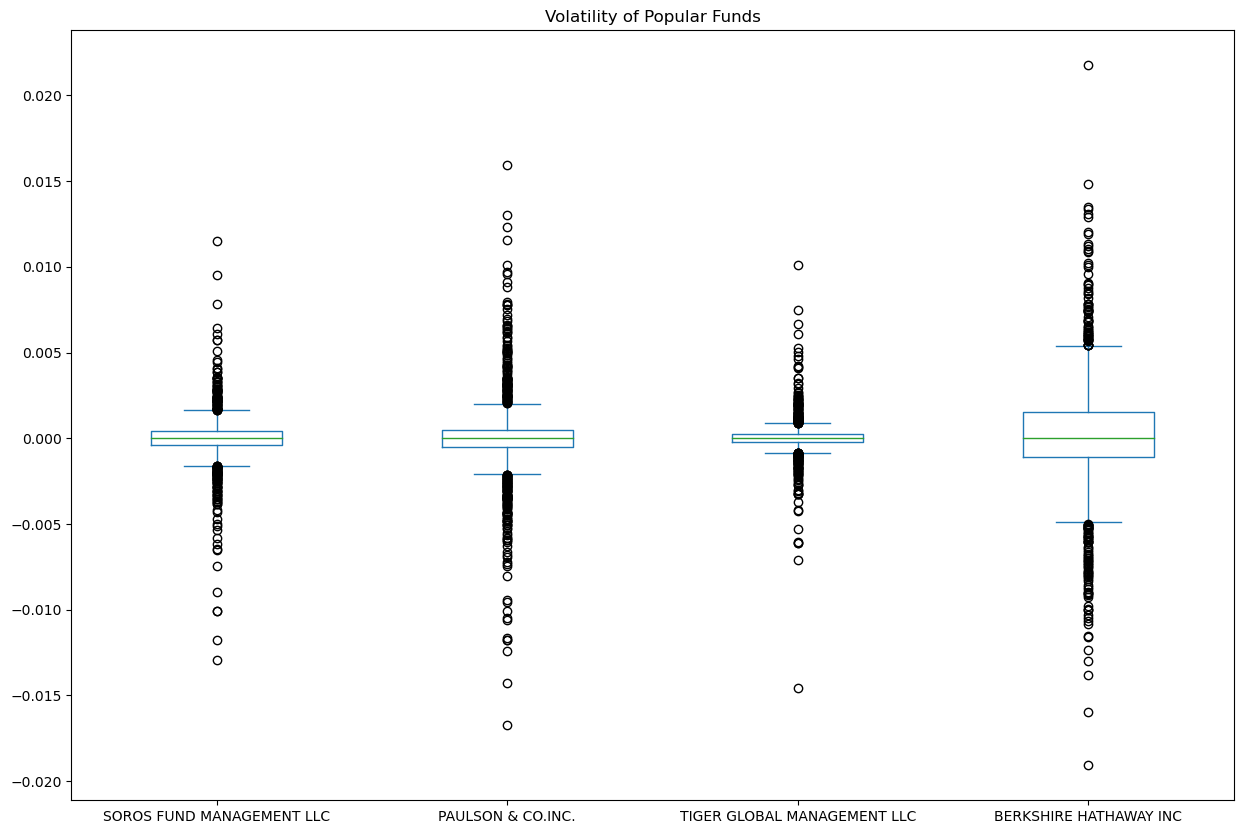

In [298]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
hedge_funds_df = whale_navs_daily_returns.drop(['S&P 500'],axis=1)
hedge_funds_df.plot(kind='box',figsize=(15,10),title= 'Volatility of Popular Funds')
ax.legend(["S&P 500","SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT"])

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # Based on my analysis of the four portfolios, I can clearly see that Berkshire Hathaway is the most volatile of the four portfolios, with the largest spread-- but with a propensity to actually outperform, rather than underperform in the market. Tiger Global Management is the least volatile by far, with a very narrow spread, aswell as a narrow spread of outliers. 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [299]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
whale_navs_std = whale_navs_daily_returns.std()
whale_navs_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [300]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252
annualized_std = whale_navs_std * np.sqrt(trading_days)
annualized_std.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

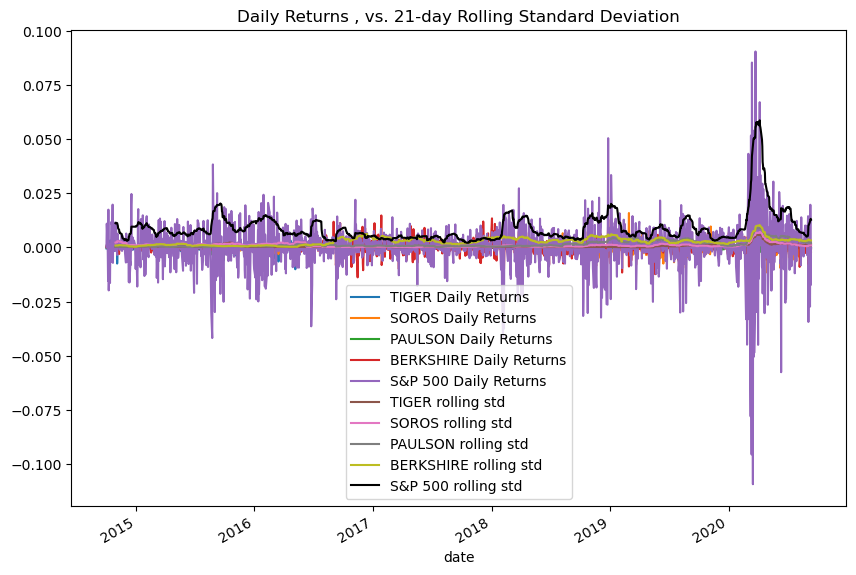

In [301]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
ax = whale_navs_daily_returns.plot(kind='line',figsize=(10,7), title="Daily Returns , vs. 21-day Rolling Standard Deviation")
whale_navs_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
whale_navs_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
whale_navs_daily_returns['PAULSON & CO.INC.'].rolling(window=21).std().plot(ax=ax)
whale_navs_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(ax=ax)
whale_navs_daily_returns['S&P 500'].rolling(window=21).std().plot(ax=ax,color='black')
# Note : please check the code for the correct label-color combinations, not the label itself. 
ax.legend(["TIGER Daily Returns", 'SOROS Daily Returns','PAULSON Daily Returns','BERKSHIRE Daily Returns','S&P 500 Daily Returns', 'TIGER rolling std', 'SOROS rolling std', 'PAULSON rolling std', 'BERKSHIRE rolling std', 'S&P 500 rolling std'])

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

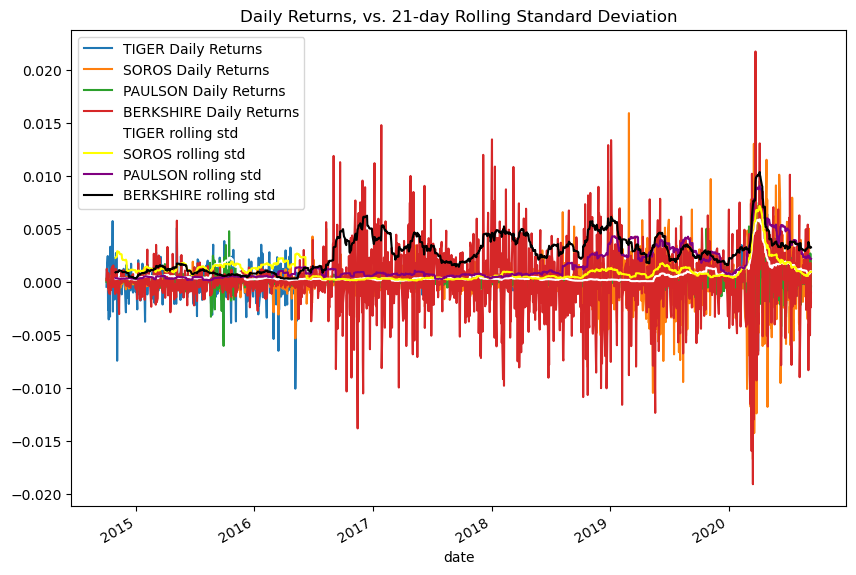

In [302]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 


ax = hedge_funds_df.plot(kind='line',figsize=(10,7), title="Daily Returns, vs. 21-day Rolling Standard Deviation")

hedge_funds_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(color='white',ax=ax)
hedge_funds_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(color='yellow',ax=ax)
hedge_funds_df['PAULSON & CO.INC.'].rolling(window=21).std().plot(color='purple',ax=ax)
hedge_funds_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(color='black',ax=ax)

# Note : please check the code for the correct label-color combinations, not the label itself. 
ax.legend(["TIGER Daily Returns", 'SOROS Daily Returns','PAULSON Daily Returns','BERKSHIRE Daily Returns','TIGER rolling std', 'SOROS rolling std', 'PAULSON rolling std', 'BERKSHIRE rolling std'])

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

None. None are close to the std of the S&P 500. 

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

Yes, but nowhere near the extent of the S&P 500. Berkshire Hathaway moves closest to the S&P 500, while the other move independently (more so). 

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

Berkshire Hathaway consistently displays the most risk out of the four portfolios. Berkshire Hathaway becomes more and more volatile, whereas TIGER has improved their volatility metrics. TIGER has consistently proved itself to be a safe option for the bearish investor, and Paulson has had a rough patch since the third quarter of 2018. All portfolios were affected significantly in 2020, but we clearly see SOROS and TIGER recover instantly, returning close to baseline in terms of std. 


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # None. None are close to the std of the S&P 500. 

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Yes, but nowhere near the extent of the S&P 500. Berkshire Hathaway moves closest to the S&P 500, while the other move independently (more so). 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire Hathaway consistently displays the most risk out of the four portfolios. Berkshire Hathaway becomes more and more volatile, whereas TIGER has improved their volatility metrics. TIGER has consistently proved itself to be a safe option for the bearish investor, and Paulson has had a rough patch since the third quarter of 2018. All portfolios were affected significantly in 2020, but we clearly see SOROS and TIGER recover instantly, returning close to baseline in terms of std. 


---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [303]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
average_annual_return = whale_navs_daily_returns.mean() * trading_days 
average_annual_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [304]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios = average_annual_return / annualized_std
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratio of Funds, and S&P 500'}>

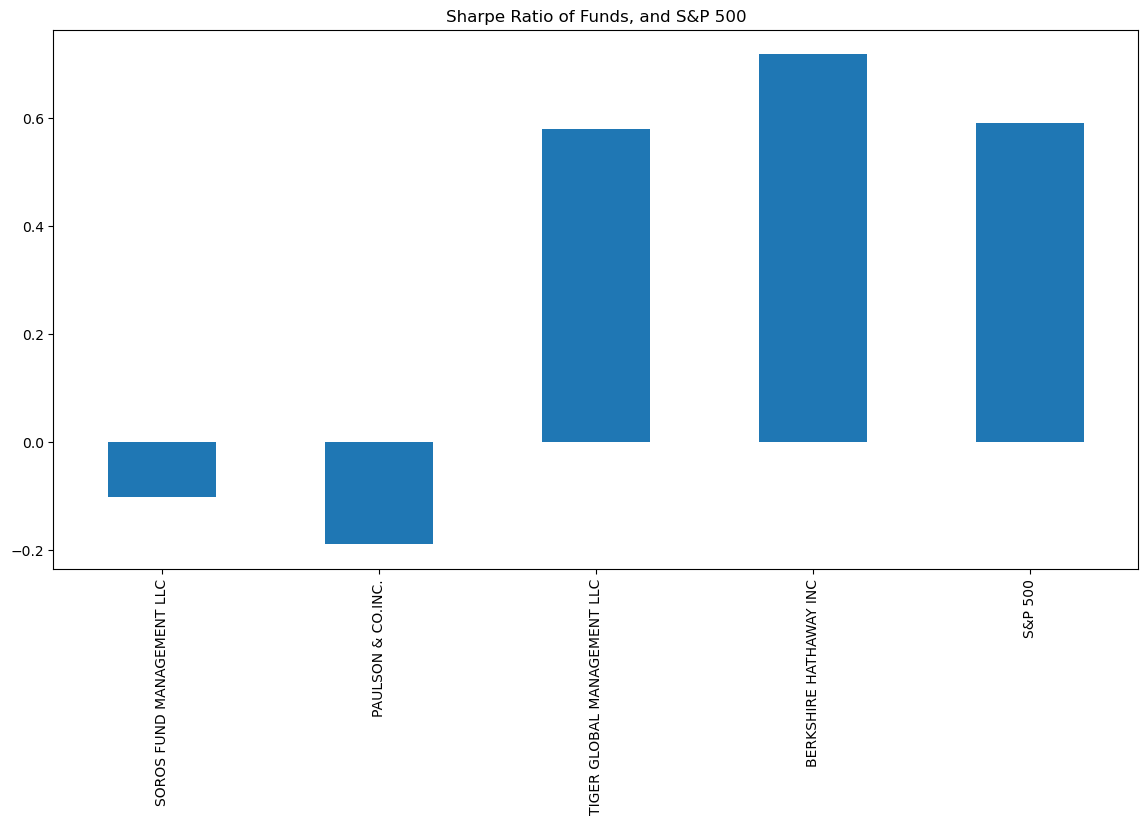

In [305]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(figsize=(14,7),kind='bar',title='Sharpe Ratio of Funds, and S&P 500')


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Berkshire Hathaway offers an amazing risk return profile, moving closely to the S&P 500 in terms of growth, with mitigated loses in downturns in the market. TIGER GLOBAL offers a similar risk-reward ratio-- yet as we saw earlier, offers less returns overall. I would recommend Berkshire Hathaway over all the other portfolios. The two that I haven't mentioned seem to be ripping off their clientele!

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

<AxesSubplot:title={'center':'60 day rolling variance of funds, without S&P 500'}, xlabel='date'>

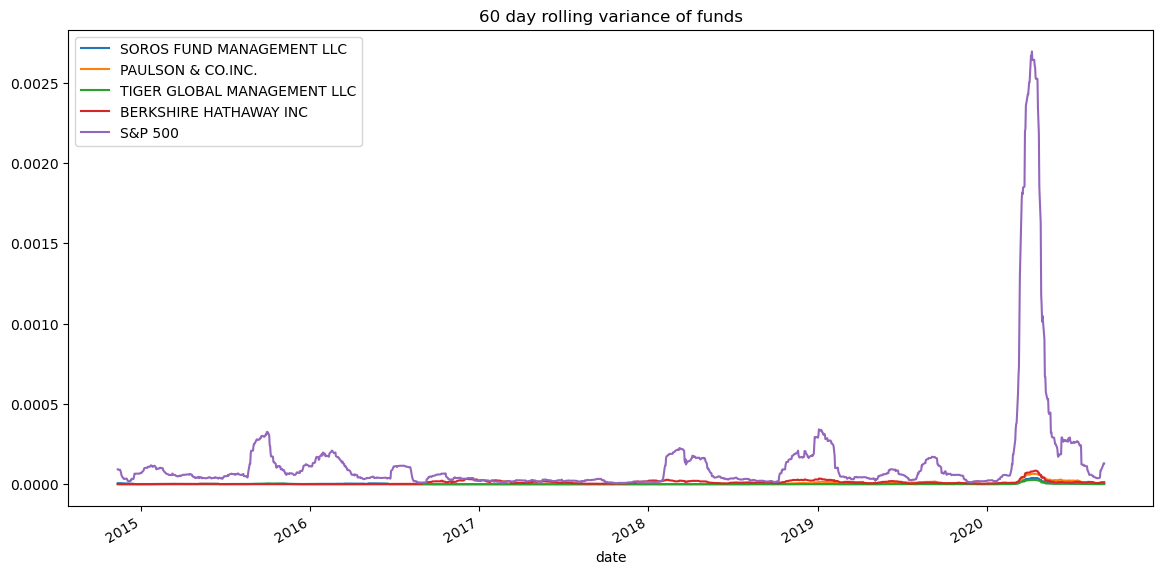

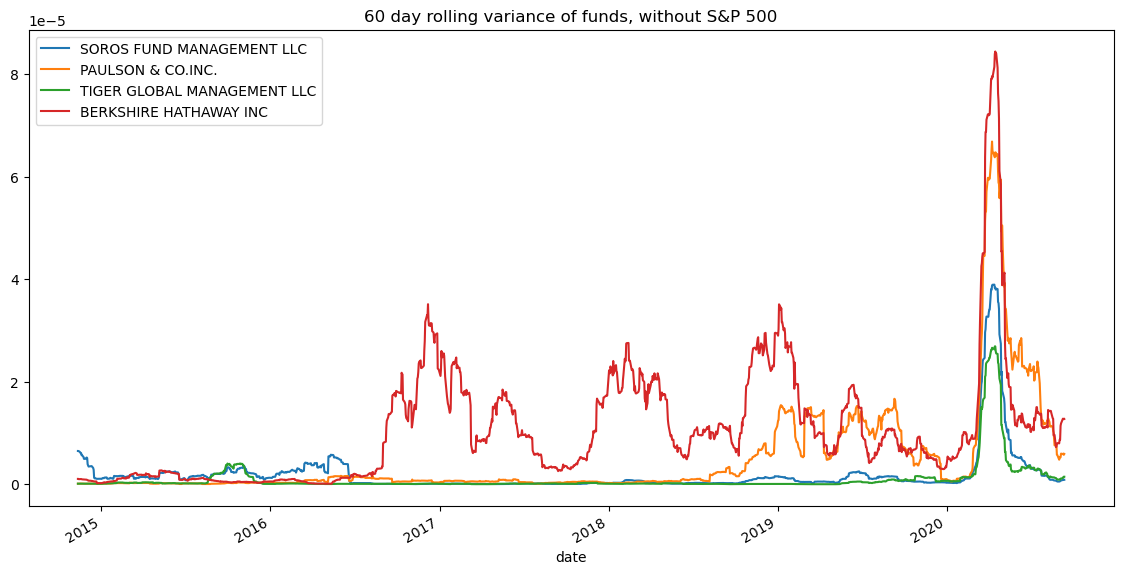

In [306]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
portfolios_rolling_60_variance = whale_navs_daily_returns.rolling(window=30).var()
portfolios_rolling_60_variance.plot(figsize=(14,7),title="60 day rolling variance of funds")
portfolios_rolling_60_var_nosp500 = portfolios_rolling_60_variance.drop(['S&P 500'], axis=1)
portfolios_rolling_60_var_nosp500.plot(figsize=(14,7),title="60 day rolling variance of funds, without S&P 500")

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

1. These are the last five rows of the covariance data for all portfolios:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2020-09-04,0.000009,0.000009,0.000008,0.000021
2020-09-08,0.000010,0.000010,0.000009,0.000023
2020-09-09,0.000010,0.000010,0.000010,0.000024
2020-09-10,0.000010,0.000010,0.000010,0.000024
2020-09-11,0.000010,0.000010,0.000010,0.000024


<AxesSubplot:title={'center':'Rolling Covariance between portfolios, stopping before COVID-19 pandemic  '}, xlabel='date'>

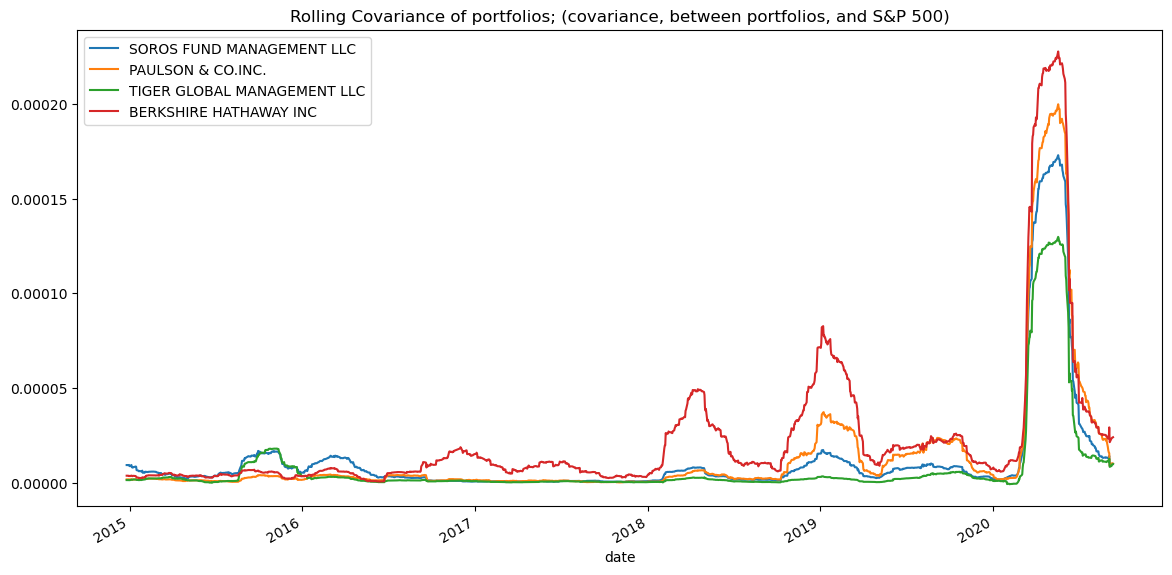

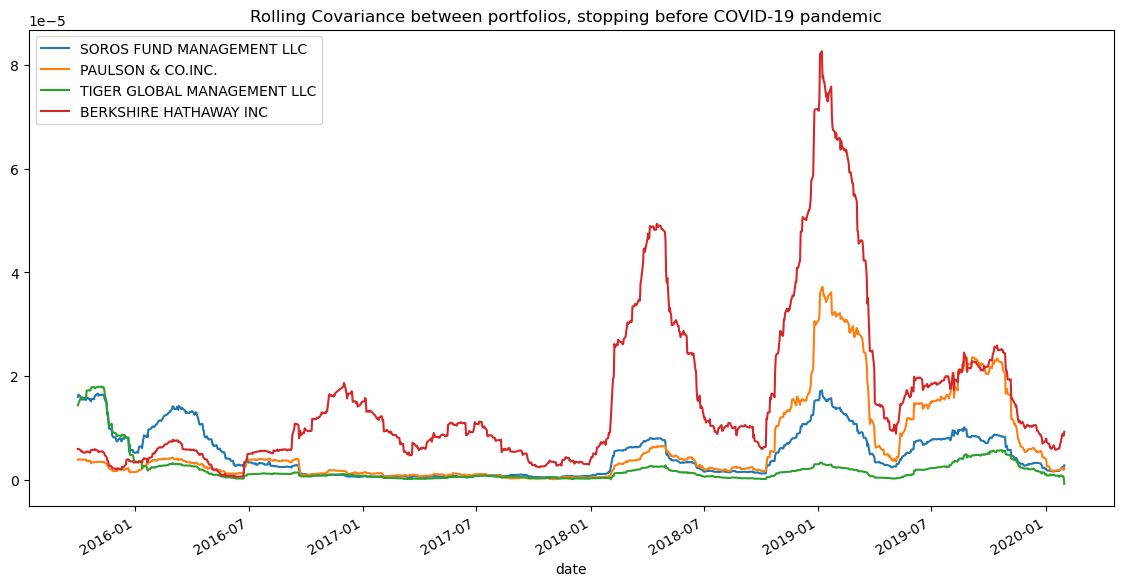

In [325]:
# ALL PORTFOLIOS
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
portfolio_daily_returns = whale_navs_daily_returns.drop(['S&P 500'], axis =1)
portfolios_rolling_60_covariance = portfolio_daily_returns.rolling(60).cov(whale_navs_daily_returns['S&P 500'])
print("1. These are the last five rows of the covariance data for all portfolios:")
display(portfolios_rolling_60_covariance.tail())
# removing the S&P 500 from the df, to quickly get a look at the covariance of the different portfolios, overtime.
portfolios_rolling_60_covariance.plot(
    figsize=(14,7), 
    title = 'Rolling Covariance of portfolios; (covariance, between portfolios, and S&P 500)'
)
# here, I stopped the plot from displaying all data until after 2020, as the 2020 COVID_19 pandemic skewed the data, and created outliers that make it hard to see how the funds had acted under normal market conditions.
portfolios_rolling_60_covariance_nosp_no2020 = portfolios_rolling_60_covariance_nosp.loc['2015-10-01':'2020-2-01']
portfolios_rolling_60_covariance_nosp_no2020.plot(
    figsize=(14,7),
    title = 'Rolling Covariance between portfolios, stopping before COVID-19 pandemic  '
)

2. These are the last five rows of the covariance data for TIGER GLOBAL MANAGEMENT LLC:


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

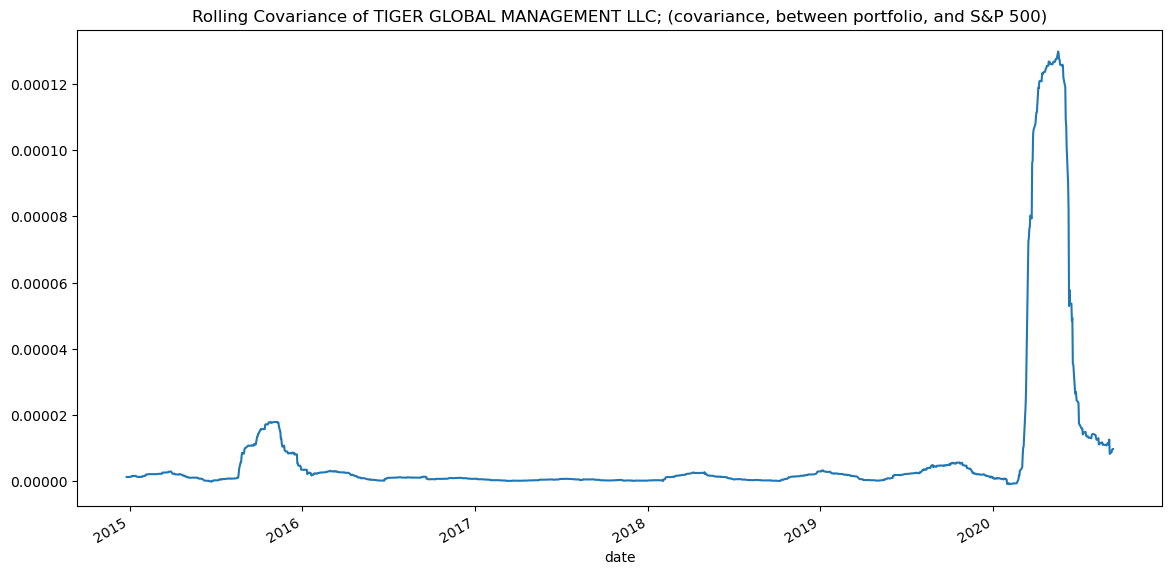

In [337]:
# TIGER GLOBAL MANAGEMENT LLC
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_rolling_60_covariance = portfolio_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(60).cov(whale_navs_daily_returns['S&P 500'])
tiger_rolling_60_covariance.plot(
    figsize=(14,7), 
    title = 'Rolling Covariance of TIGER GLOBAL MANAGEMENT LLC; (covariance, between portfolio, and S&P 500)'
)

print("2. These are the last five rows of the covariance data for TIGER GLOBAL MANAGEMENT LLC:")
display(tiger_rolling_60_covariance.tail())


#### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [312]:
# ALL PORTFOLIOS
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
market_variance = whale_navs_daily_returns['S&P 500'].var()
print(f"1. market variance (variance of the S&P 500) is :{market_variance} ")
portfolios_rolling_60_beta = portfolios_rolling_60_covariance / market_variance
print("2. Last five rows of beta information for all portfolios: ")
portfolios_rolling_60_beta.tail()

1. market variance (variance of the S&P 500) is :0.00013339401911764478 
2. Last five rows of beta information : 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2020-09-04,0.067043,0.065673,0.062471,0.160205
2020-09-08,0.072800,0.076027,0.066421,0.175904
2020-09-09,0.073719,0.076510,0.071648,0.177044
2020-09-10,0.074968,0.076362,0.073249,0.178787
2020-09-11,0.074423,0.075417,0.073362,0.179769


In [327]:
# TIGER GLOBAL MANAGEMENT LLC
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_rolling_60_beta = portfolios_rolling_60_covariance['TIGER GLOBAL MANAGEMENT LLC'] / market_variance
print("2. Last five rows of beta information for TIGER GLOBAL MANAGEMENT LLC: ")
tiger_rolling_60_beta.tail()

2. Last five rows of beta information for TIGER GLOBAL MANAGEMENT LLC: 


date
2020-09-04    0.062471
2020-09-08    0.066421
2020-09-09    0.071648
2020-09-10    0.073249
2020-09-11    0.073362
Name: TIGER GLOBAL MANAGEMENT LLC, dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [331]:
# ALL PORTFOLIOS
# Calculate the average of the 60-day rolling beta
print("the average of the 60-day rolling beta, for different portfolios : ")
portfolios_rolling_60_beta.mean().sort_values()


the average of the 60-day rolling beta, for different portfolios : 


TIGER GLOBAL MANAGEMENT LLC    0.057886
SOROS FUND MANAGEMENT LLC      0.092696
PAULSON & CO.INC.              0.108043
BERKSHIRE HATHAWAY INC         0.174264
dtype: float64

In [332]:
# TIGER GLOBAL MANAGEMENT LLC
# Calculate the average of the 60-day rolling beta
print(f"The average of the 60-day rolling beta for TIGER GLOBAL MANAGEMENT LLC is : {tiger_rolling_60_beta.mean()}")


The average of the 60-day rolling beta for TIGER GLOBAL MANAGEMENT LLC is : 0.05788619551554748


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-day rolling beta of portfolios-- measured against market index'}, xlabel='date'>

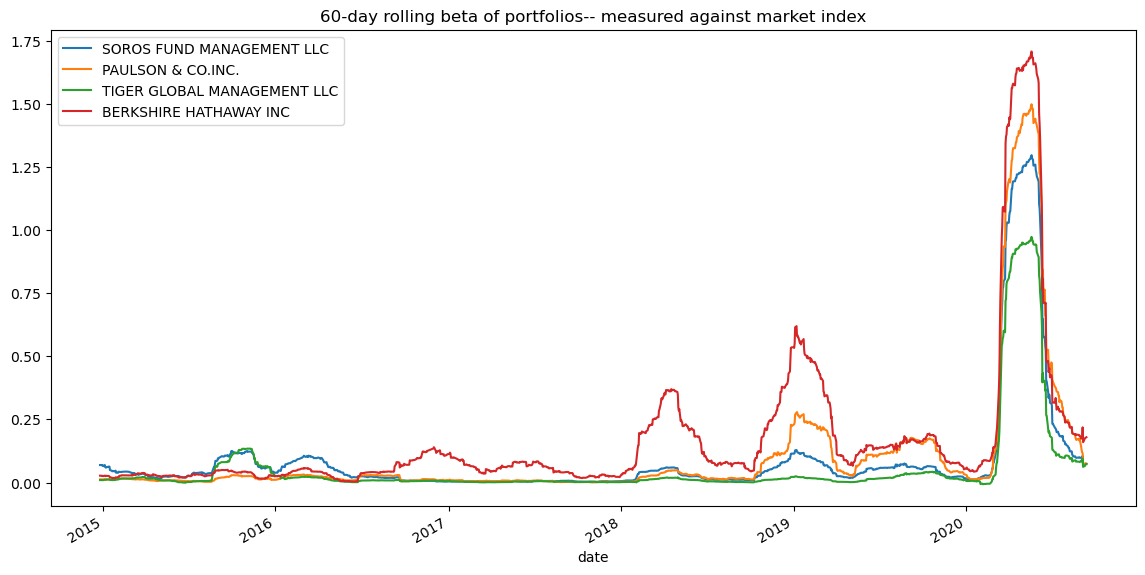

In [333]:
# ALL PORTFOLIOS
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolios_rolling_60_beta.plot(
    kind='line',
    figsize=(14,7),
    title="60-day rolling beta of portfolios-- measured against market index"
)


<AxesSubplot:title={'center':'60-day rolling beta of portfolios-- measured against market index'}, xlabel='date'>

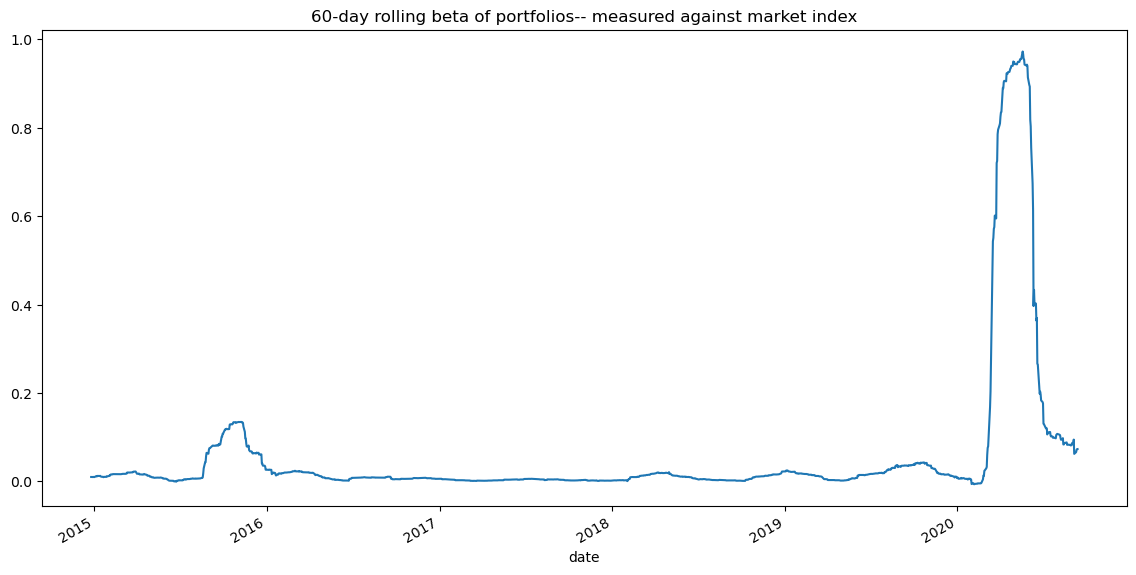

In [334]:
# TIGER GLOBAL MANAGEMENT LLC
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_rolling_60_beta.plot(
    kind='line',
    figsize=(14,7),
    title="60-day rolling beta of TIGER GLOBAL MANAGEMENT LLC-- measured against market index"
)

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. These are the last five rows of the covariance data for BERSKHIRE HATHAWAY INC:


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

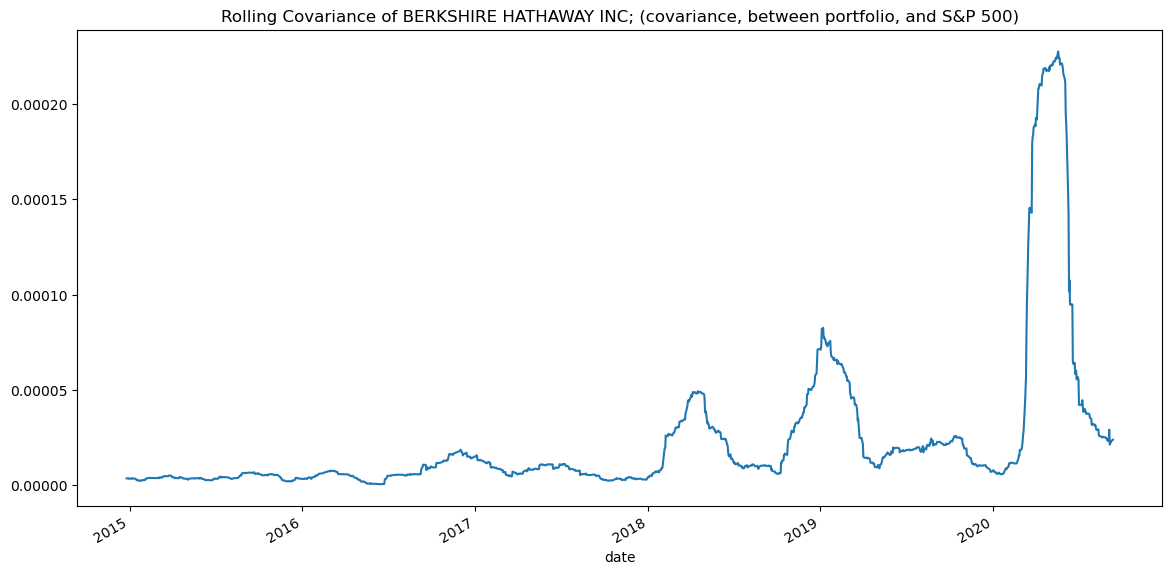

In [336]:
# BERKSHIRE HATHAWAY INC
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
bh_rolling_60_covariance = portfolio_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(60).cov(whale_navs_daily_returns['S&P 500'])
bh_rolling_60_covariance.plot(
    figsize=(14,7), 
    title = 'Rolling Covariance of BERKSHIRE HATHAWAY INC; (covariance, between portfolio, and S&P 500)'
)

print("2. These are the last five rows of the covariance data for BERSKHIRE HATHAWAY INC:")
display(bh_rolling_60_covariance.tail())


##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [338]:
# BERKSHIRE HATHAWAY INC
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
bh_rolling_60_beta = portfolios_rolling_60_covariance['BERKSHIRE HATHAWAY INC'] / market_variance
print("2. Last five rows of beta information for BERKSHIRE HATHAWAY INC: ")
bh_rolling_60_beta.tail()


2. Last five rows of beta information for BERKSHIRE HATHAWAY INC: 


date
2020-09-04    0.160205
2020-09-08    0.175904
2020-09-09    0.177044
2020-09-10    0.178787
2020-09-11    0.179769
Name: BERKSHIRE HATHAWAY INC, dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [339]:
# BERKSHIRE HATHAWAY INC
# Calculate the average of the 60-day rolling beta
print(f"The average of the 60-day rolling beta for BERKSHIRE HATHAWAY INC is : {bh_rolling_60_beta.mean()}")



The average of the 60-day rolling beta for BERKSHIRE HATHAWAY INC is : 0.17426441070579793


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-day rolling beta of BERKSHIRE HATHAWAY INC-- measured against market index'}, xlabel='date'>

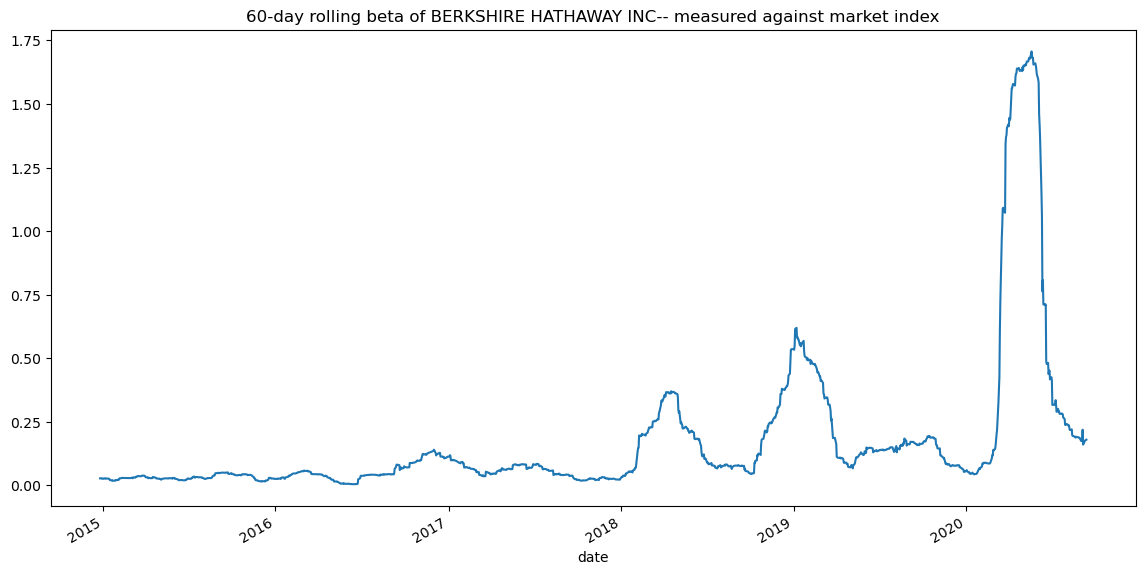

In [341]:
# BERKSHIRE HATHAWAY INC
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
bh_rolling_60_beta.plot(
    kind='line',
    figsize=(14,7),
    title="60-day rolling beta of BERKSHIRE HATHAWAY INC-- measured against market index"
)


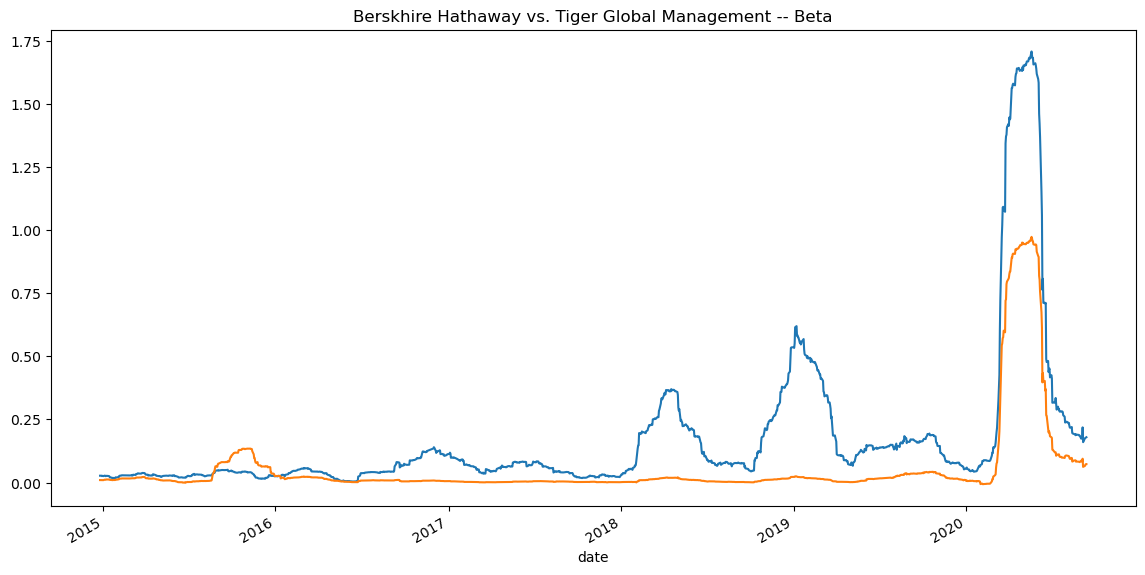

In [369]:
# Comparing both portfolios against one another BETA :
ax = bh_rolling_60_beta.plot(
    kind='line',
    figsize=(14,7),
    title="Berskhire Hathaway vs. Tiger Global Management -- Beta"
)

tiger_rolling_60_beta.plot(ax=ax)

ax.legend=(['Berkshire Hathaway Beta'],['Tiger Global Management Beta'])



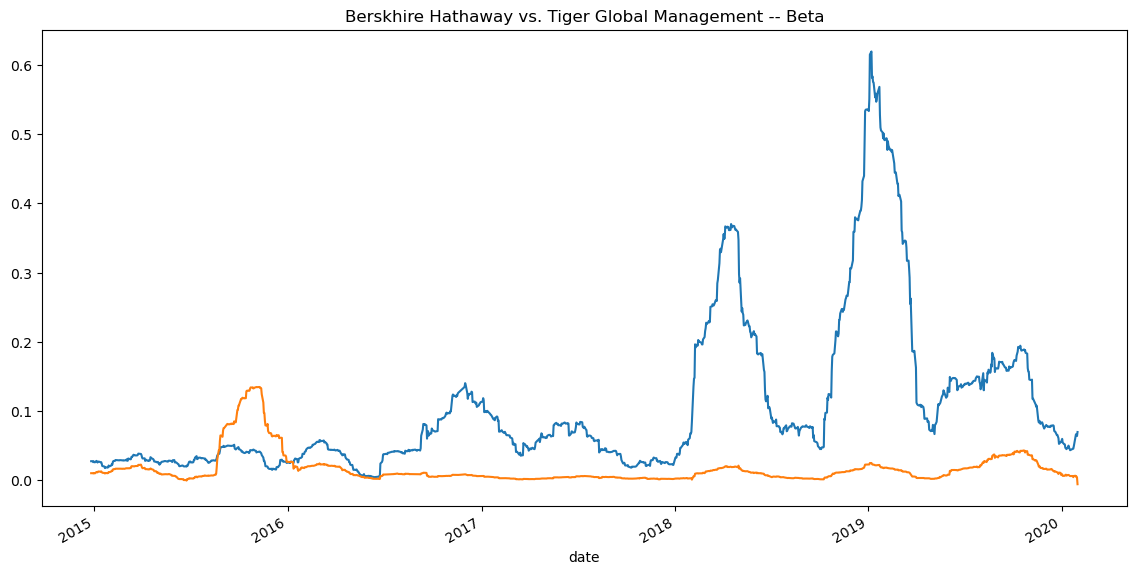

In [370]:
# Comparing both portfolios against one another BETA :
ax = bh_rolling_60_beta.loc["2014-10-01":"2020-02-01"].plot(
    kind='line',
    figsize=(14,7),
    title="Berskhire Hathaway vs. Tiger Global Management -- Beta"
)

tiger_rolling_60_beta.loc["2014-10-01":"2020-02-01"].plot(ax=ax)

ax.legend=(['Berkshire Hathaway Beta'],['Tiger Global Management Beta'])



In [377]:
# ax = sharpe_ratios['BERKSHIRE HATHAWAY INC'].plot(figsize=(14,7),kind='bar',title='Sharpe Ratio of Funds, and S&P 500')

bh_sr = sharpe_ratios['BERKSHIRE HATHAWAY INC']
tr_sr = sharpe_ratios['TIGER GLOBAL MANAGEMENT LLC']
dif = bh_sr - tr_sr
print(f"The sharpe ratio of Berkshire Hathaway stands at : {bh_sr} whereas the sharpe ratio of Tiger Global Management stands at : {tr_sr} . the difference between the two (how kuch Berkshire hathaway outperforms Tiger in terms of sharpe ratio) is : {dif} . ")

The sharpe ratio of Berkshire Hathaway stands at : 0.7175123324510326 whereas the sharpe ratio of Tiger Global Management stands at : 0.5790020354039171 . the difference between the two (how kuch Berkshire hathaway outperforms Tiger in terms of sharpe ratio) is : 0.13851029704711548 . 


Based on the plot, we can see that Berkshire 60-day rolling beta had ben maintaining itself incredibly close to baseline, until it began fluctuating signifcanty as it approached the 0.75 mark in 2019, and eventually the 1.75 mark in 2020. This means that for every 1% in the market, Berkshire Hathaway stock may move almost twice as much, showing that Berskhire Hathaway have constistently ben increasing their risk in relation to the market for the past decade or so. 2020 seems to be an outlier. In removing the outlier values of the 2020 COVID 19 pandemic, we also see that Berkshire Hathaway's movements anf fluctuations in value 'away' from the general movements of the market (S&P 500) may show a tendency for Berskhire hathaway to actually outperform the market, which is also supported by looking at Berkshire Hathaways returns (which signifcantly overshadow those of Tiger Global Management)



#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

    BERKSHIRE HATHAWAY INC constistently moves closer to the market than Tiger Global Management does. 

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

    I would recommend 

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # BERKSHIRE HATHAWAY INC constistently shows a higher level of sensitiity to market fluctuations than Tiger Global Management does. Tiger Global Management does show less volatility in times of market distress, but that loss of volatility is offset by it's lower returns. Out of all the portfolios, these two show the best risk-reward ratios, and hold different usecases, even though both show value in different areas. 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # I would recommend both-- but depending on who the customer is! For the older, more risk averse customer-- I wou

---